# Graph 1: When do we reach the target?

Current Net Income: 3045.0
Optimization Success: False
Optimized Parameters: [4.00000000e+00 5.40316834e+02 0.00000000e+00 2.00000000e+00
 2.00000000e+00 3.00000000e+02 8.79026834e+01 2.00000000e+02
 1.31856219e+02 1.00000000e+02 5.00000000e+01 1.00000000e+02
 5.00000000e+01 5.00000000e+01 2.00000000e+01 5.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e-01 2.00000000e+02
 0.00000000e+00 1.00000000e+00 1.00000000e+00 3.00000000e+01
 2.00000000e+01 5.00000000e+01 3.00000000e+01 1.00000000e+01
 5.00000000e+00 1.00000000e+01 5.00000000e+00 1.00000000e+01
 5.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+02 5.00000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Achieved Net Income: 7720.3104473467965


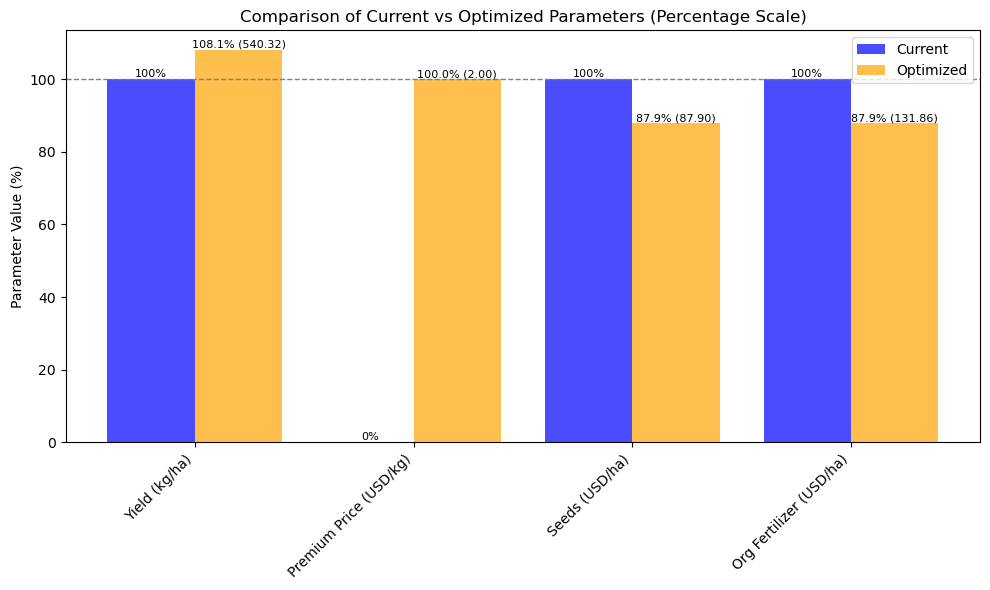

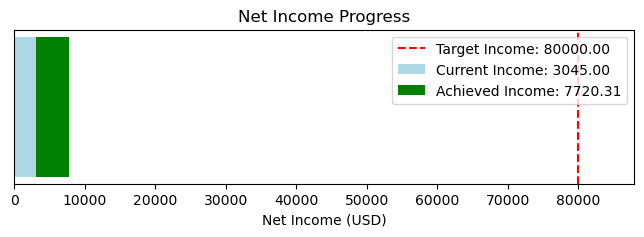

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Parameter Bounds
# ---------------------------------------------------------
parameter_bounds = [
    (4,6),          # 0: Land in ha
    (500, 2000),    # 1: Yield in kg/ha
    (0, 200),       # 2: Loss in kg/ha
    (2, 6),         # 3: Farmgate price in USD/kg
    (0, 2),         # 4: Premium price in USD/kg
    (50, 300),      # 5: Labour costs in USD/ha
    (20, 100),      # 6: Seeds costs in USD/ha
    (50, 200),      # 7: Conventional fertilizer in USD/ha
    (30, 150),      # 8: Organic fertilizer in USD/ha
    (20, 100),      # 9: Conventional chemicals in USD/ha
    (10, 50),       # 10: Organic chemicals in USD/ha
    (10, 100),      # 11: Irrigation cost in USD/ha
    (5, 50),        # 12: Energy cost in USD/ha
    (10, 50),       # 13: Other land costs in USD/ha
    (5, 20),        # 14: Storage costs in USD/ha
    (5, 20),        # 15: Marketing costs in USD/ha
    (0, 50),        # 16: Certification costs in USD/ha
    (0, 50),        # 17: Cost of capital in USD/ha
    
    (0.5, 5.0),     # 18: Land size for secondary crop in ha
    (200, 1000),    # 19: Yield for secondary crop in kg/ha
    (0,100),        # 20: Loss for secondary crop
    (1, 5),         # 21: Farmgate price for secondary crop in USD/kg
    (1,1),          # 22: Price premium secondary crop in USD/kg (fixed)
    (30, 150),      # 23: Labour costs secondary crop in USD/ha
    (20, 50),       # 24: Seeds costs secondary crop in USD/ha
    (50, 100),      # 25: Conventional fertilizer secondary crop in USD/ha
    (30, 80),       # 26: Organic fertilizer secondary crop in USD/ha
    (10, 20),       # 27: Conventional chemicals secondary crop in USD/ha
    (5, 10),        # 28: Organic chemicals secondary crop in USD/ha
    (10, 35),       # 29: Irrigation cost secondary crop in USD/ha
    (5, 15),        # 30: Energy cost secondary crop in USD/ha
    (10, 20),       # 31: Other land costs secondary crop in USD/ha
    (5, 20),        # 32: Storage costs secondary crop in USD/ha
    (5, 20),        # 33: Marketing costs secondary crop in USD/ha
    (0, 50),        # 34: Certification costs secondary crop in USD/ha
    (0, 50),        # 35: Cost of capital secondary crop in USD/ha
    
    (100, 120),     # 36: Livestock income in USD
    (50, 200),      # 37: Off-farm income in USD
    (0, 300),       # 38: Investments and transfers in USD
    (0, 300),       # 39: Other net on-farm income in USD
    (0, 300)        # 40: Other diversified income in USD
]

    


# ---------------------------------------------------------
# Function: calculate_net_income
# ---------------------------------------------------------
def calculate_net_income(params):
    """
    Calculate the net income based on both primary and secondary 
    crop parameters, plus additional income sources.
    """
    
    (
        land, yield_primary, loss, farmgate_price, premium_price,
        labour_costs, seeds_costs, conv_fertilizer_cost, org_fertilizer_cost,
        conv_chemicals_cost, org_chemicals_cost, irrigation_cost, energy_cost,
        other_land_costs, storage_costs, marketing_costs, certification_costs,
        cost_of_capital, 

        secondary_crop_land, secondary_crop_yield, secondary_crop_loss, 
        secondary_crop_farmgate_price, secondary_crop_premium_price,
        secondary_crop_labour_cost, secondary_crop_seeds_costs, 
        secondary_crop_conv_fertilizer_cost, secondary_crop_org_fertilizer_cost,
        secondary_crop_conv_chemicals_cost, secondary_crop_org_chemicals_cost, 
        secondary_crop_irrigation_cost, secondary_crop_energy_cost,
        secondary_crop_other_land_costs, secondary_crop_storage_costs, 
        secondary_crop_marketing_costs, secondary_crop_certification_costs,
        secondary_crop_cost_of_capital,

        livestock_income, off_farm_income, investments_transfers, 
        net_on_farm_income, diversified_income
    ) = params

    # Revenue from crops
    primary_crop_revenue = land * (yield_primary - loss) * (farmgate_price + premium_price)
    secondary_crop_revenue = (
        secondary_crop_land * (secondary_crop_yield - secondary_crop_loss)
        * (secondary_crop_farmgate_price + secondary_crop_premium_price)
    )
    
    # Primary crop costs
    input_costs_primary = (
        labour_costs + seeds_costs + conv_fertilizer_cost + org_fertilizer_cost
        + conv_chemicals_cost + org_chemicals_cost
    )
    irrigation_energy_costs_primary = irrigation_cost + energy_cost
    land_related_costs_primary = other_land_costs + storage_costs + marketing_costs
    certification_financing_costs_primary = certification_costs + cost_of_capital
    total_costs_primary = (
        input_costs_primary
        + irrigation_energy_costs_primary
        + land_related_costs_primary
        + certification_financing_costs_primary
    )
    
    # Secondary crop costs
    input_costs_secondary = (
        secondary_crop_labour_cost + secondary_crop_seeds_costs
        + secondary_crop_conv_fertilizer_cost + secondary_crop_org_fertilizer_cost
        + secondary_crop_conv_chemicals_cost + secondary_crop_org_chemicals_cost
    )
    irrigation_energy_costs_secondary = secondary_crop_irrigation_cost + secondary_crop_energy_cost
    land_related_costs_secondary = (
        secondary_crop_other_land_costs + secondary_crop_storage_costs
        + secondary_crop_marketing_costs
    )
    certification_financing_costs_secondary = (
        secondary_crop_certification_costs + secondary_crop_cost_of_capital
    )
    total_costs_secondary = (
        input_costs_secondary
        + irrigation_energy_costs_secondary
        + land_related_costs_secondary
        + certification_financing_costs_secondary
    )
    
    # Net income
    net_income_primary = primary_crop_revenue - total_costs_primary
    net_income_secondary = secondary_crop_revenue - total_costs_secondary
    
    return (
        net_income_primary
        + net_income_secondary
        + livestock_income
        + off_farm_income
        + investments_transfers
        + net_on_farm_income
        + diversified_income
    )


# ---------------------------------------------------------
# Function: optimize_income
# ---------------------------------------------------------
def optimize_income(target_income, parameter_bounds, current_values, editable_indices, penalty_factor=2.0):
    """
    Optimize certain parameters to meet or exceed a target net income,
    but also penalize large deviations from the current values for 
    the editable parameters.
    
    Parameters:
    -----------
    target_income : float
        The minimum net income desired.
    parameter_bounds : list of tuples
        Each tuple specifies (lower_bound, upper_bound) for the parameters.
    current_values : list
        The current values of all parameters, in the same order as parameter_bounds.
    editable_indices : list
        Indices of parameters that are allowed to vary during optimization.
    penalty_factor : float
        Controls how strongly to penalize deviations from current values.
    
    Returns:
    --------
    result : OptimizeResult
        The result object from scipy.optimize.minimize.
    """
    
    def objective_function(params):
        """
        We keep the negative net income part (to maximize net income),
        and add a penalty if editable parameters deviate from current 
        values.
        """
        neg_net_income = -calculate_net_income(params)


        

        # PENALTY based on the impact of drivers on income. 
        """
        The model is currently prioritising changing the drivers that have
        the largest impact on income and with a uniform penalty, the model is 
        not incentivised to adjust parameters with less impact. 
        This code calculates the impact of drivers on income and adjusts the penalty accordingly.
        """
        
        income_sensitivity = {}
        baseline_income = calculate_net_income(current_values)
        scaling_factor = 10000

        #Calculating income based on a 1% increase in editable drivers and calculating the absolute difference from baseline income
        for i in editable_indices:
            test_params = current_values.copy()
            test_params[i] *= 1.01  # Small 1% increase
            new_income = calculate_net_income(test_params)
            income_sensitivity[i] = abs(new_income - baseline_income)  # Sensitivity Score

        # Normalising the absolute differences in income to account for scale
        total_sensitivity = sum(income_sensitivity.values()) + 1e-9  # Avoid division by zero
        income_sensitivity = {i: (s / total_sensitivity) * scaling_factor for i, s in income_sensitivity.items()}



        penalty = 0.0
        for i in editable_indices:
            difficulty_factor = user_defined_difficulty.get(i, 1) 
            percentage_change = (params[i] - current_values[i]) / (current_values[i] + 1e-9)
            penalty += income_sensitivity[i]* difficulty_factor * percentage_change**2 


        return neg_net_income + penalty_factor * penalty
        """
        
        # Compute penalty for deviating from current values
        penalty = 0.0
        for i in editable_indices:
            percentage_change = (params[i] - current_values[i]) / (current_values[i] + 1e-9)
            difficulty_factor = user_defined_difficulty.get(i, 1) 
            penalty += difficulty_factor * percentage_change**2
        
        return neg_net_income + penalty_factor * penalty
        
        """
    
    # Constraint: net income should be >= target_income
    def constraint_function(params):
        return calculate_net_income(params) - target_income
    
    constraints = [{'type': 'ineq', 'fun': constraint_function}]
    
    # Adjust bounds: fix non-editable parameters at current values
    bounds = []
    for i, (low, high) in enumerate(parameter_bounds):
        if i in editable_indices:
            bounds.append((low, high))
        else:
            bounds.append((current_values[i], current_values[i]))
    
    # Initial guess
    x0 = np.array(current_values)
    
    # Solve optimization
    result = minimize(objective_function, x0, bounds=bounds, constraints=constraints)
    
    if not result.success:
        print("Warning: Optimization failed to meet the target income.")
    
    return result


# ---------------------------------------------------------
# UPDATED Function: create_comparison_bar_chart
# ---------------------------------------------------------
def create_comparison_bar_chart(current_values, optimized_values, parameter_labels, editable_indices):

    """
    Create a side-by-side bar chart comparing current vs optimized parameters
    on a PERCENTAGE scale, with each current parameter set to 100%.
    Each bar shows the percentage on the y-axis, and we also annotate with
    the actual absolute value in parentheses.

    Parameters:
    -----------
    current_values : list
        Current parameter values for all parameters.
    optimized_values : list
        Optimized parameter values for all parameters.
    parameter_labels : list of str
        Labels for each parameter in the same order as the values.
    editable_indices : list
        Indices of parameters that were optimized (editable).
    """
    # Extract only the parameters that are editable
    current_values_editable = [current_values[i] for i in editable_indices]
    optimized_values_editable = [optimized_values[i] for i in editable_indices]
    parameter_labels_editable = [parameter_labels[i] for i in editable_indices]
    """
    # Convert both current and optimized values to percentages 
    # relative to the current values (which become 100%).
    current_percentages = [100.0] * len(current_values_editable)
    optimized_percentages = []
    for cval, oval in zip(current_values_editable, optimized_values_editable):
        if cval != 0:
            optimized_percentages.append((oval / cval) * 100)
        else:
            # If the current value is 0, define the optimized as 100 
            optimized_percentages.append(0.0)

    """
    current_percentages = []
    optimized_percentages = []

    for cval, oval in zip(current_values_editable, optimized_values_editable):
        if cval != 0:
            current_percentages.append(100.0)
            optimized_percentages.append((oval / cval) * 100)
        else:
            current_percentages.append(0.0)
            optimized_percentages.append(100.0)
    
    n = len(editable_indices)
    indices = np.arange(n)
    width = 0.4
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the bars using the percentage values
    bars1 = ax.bar(
        indices - width / 2, 
        current_percentages, 
        width, 
        label='Current', 
        color='blue', 
        alpha=0.7
    )
    bars2 = ax.bar(
        indices + width / 2, 
        optimized_percentages, 
        width, 
        label='Optimized', 
        color='orange', 
        alpha=0.7
    )
    
    # Configure axes and title
    ax.set_xticks(indices)
    ax.set_xticklabels(parameter_labels_editable, rotation=45, ha='right')
    ax.set_ylabel("Parameter Value (%)")
    ax.set_title("Comparison of Current vs Optimized Parameters (Percentage Scale)")
    ax.legend()
    
   # Annotate the Current bars
    for bar, cval in zip(bars1, current_values_editable):
        label_text = "100%" if cval != 0 else "0%"  # Correctly set "0%" if value is 0
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            label_text,  # This now correctly handles zeros
            ha='center',
            va='bottom',
            fontsize=8
        )

        
    # Annotate the Optimized bars
    # Show "X% (absolute_value)"
    for bar, per_val, abs_val in zip(bars2, optimized_percentages, optimized_values_editable):
        ax.text(
            bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            f"{per_val:.1f}% ({abs_val:.2f})",
            ha='center',
            va='bottom',
            fontsize=8
        )
    
    # Optional: draw a horizontal line at 100% (the baseline)
    plt.axhline(100, color='gray', linestyle='--', linewidth=1.0, label='Baseline (100%)')
    
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# Function: create_bar_chart (alternative)
# ---------------------------------------------------------
def create_bar_chart(current_values, optimized_values, parameter_labels, parameter_bounds, editable_indices):
    """
    Create a bar chart comparing current values vs. optimized values for all parameters.
    Shows percentage changes for the parameters that are editable.
    """
    n = len(current_values)
    indices = np.arange(n)
    
    percentage_changes = [
        ((optimized_values[i] - current_values[i]) / current_values[i] * 100)
        if i in editable_indices and current_values[i] != 0 else None
        for i in range(n)
    ]
    
    plt.figure(figsize=(12, 6))
    width = 0.4
    
    bars1 = plt.bar(
        indices - width / 2,
        current_values,
        width,
        label='Current Values',
        color='blue',
        alpha=0.7
    )
    bars2 = plt.bar(
        indices + width / 2,
        optimized_values,
        width,
        label='Optimized Values',
        color='orange',
        alpha=0.7
    )
    
    for i, bar in enumerate(bars2):
        if percentage_changes[i] is not None:
            change_text = f"{percentage_changes[i]:.1f}%"
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                change_text,
                ha='center',
                va='bottom',
                fontsize=8
            )
    
    plt.axhline(0, color='black', linewidth=0.5, linestyle='dashed')
    plt.xticks(indices, parameter_labels, rotation=90)
    plt.ylabel('Parameter Values')
    plt.title('Comparison of Current vs Optimized Parameters (Percentage Changes)')
    plt.legend()
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# Function: create_income_progress_bar
# ---------------------------------------------------------
def create_income_progress_bar(target_income, achieved_income, current_income):
    """
    Display a horizontal progress bar showing the current income,
    how much the optimization increased it, and the target income.
    """
    fig, ax = plt.subplots(figsize=(8, 2))
    
    ax.barh([0], [current_income], color='lightblue', label=f"Current Income: {current_income:.2f}")
    ax.barh([0], [achieved_income - current_income], left=[current_income],
            color='green', label=f"Achieved Income: {achieved_income:.2f}")
    ax.axvline(target_income, color='red', linestyle='--', label=f"Target Income: {target_income:.2f}")
    
    ax.set_xlim(0, max(target_income, achieved_income) * 1.1)
    ax.set_yticks([])
    ax.set_xlabel("Net Income (USD)")
    ax.legend(loc='upper right')
    plt.title("Net Income Progress")
    plt.show()


# ---------------------------------------------------------
# Example Usage
# ---------------------------------------------------------
if __name__ == "__main__":
    target_income = 80000
    
    current_values = [4, 500, 0, 2, 0, 300, 100, 200,
                      150, 100, 50, 100, 50, 50, 20, 
                      5, 0, 0, 0.5, 200, 0, 1, 1, 30, 
                      20, 50, 30, 10, 5, 10, 5, 10, 
                      5, 5, 0, 0,100, 50, 0, 0, 0]
    
    editable_indices = [1,4,6,8]  # Land (ha), Yield (kg/ha), Farmgate Price (USD/kg)

    
    user_defined_difficulty = {  
        1: 3,  
        4: 3,  
        6: 1,
        8: 1 
    }

    
    parameter_labels = [
        "Land (ha)", "Yield (kg/ha)", "Loss (kg/ha)",
        "Farmgate Price (USD/kg)", "Premium Price (USD/kg)",
        "Labour Costs (USD/ha)", "Seeds (USD/ha)", 
        "Conv Fertilizer (USD/ha)", "Org Fertilizer (USD/ha)", 
        "Conv Chemicals (USD/ha)", "Org Chemicals (USD/ha)", 
        "Irrigation Cost (USD/ha)", "Energy Cost (USD/ha)", 
        "Other Land Costs (USD/ha)", "Storage Costs (USD/ha)", 
        "Marketing Costs (USD/ha)", "Certification Costs (USD/ha)", 
        "Cost of Capital (USD/ha)", "Land for Sec Crop (ha)", 
        "Yield Sec Crop (kg/ha)", "Loss for Sec Crop (kg/ha)", 
        "Farmgate price Sec Crop (USD/kg)", "Premium price Sec Crop (USD/kg)", 
        "Labour Costs Sec Crop (USD/ha)", "Seeds Sec Crop (USD/ha)", 
        "Conv Fertilizer Sec Crop (USD/ha)", "Org Fertilizer Sec Crop (USD/ha)", 
        "Conv Chemicals Sec Crop (USD/ha)", "Org Chemicals Sec Crop (USD/ha)", 
        "Irrigation Cost Sec Crop (USD/ha)", "Energy Cost Sec Crop (USD/ha)", 
        "Other Land Costs Sec Crop (USD/ha)", "Storage Costs Sec Crop (USD/ha)", 
        "Marketing Costs Sec Crop (USD/ha)", "Certification Costs Sec Crop (USD/ha)", 
        "Cost of Capital Sec Crop (USD/ha)", "Livestock Income (USD)", 
        "Off-Farm Income (USD)", "Investments Transfers (USD)", 
        "Net On-Farm Income (USD)", "Diversified Income (USD)"
    ]
    
    # Calculate current net income
    current_income = calculate_net_income(current_values)
    
    # Optimize
    result = optimize_income(target_income, parameter_bounds, current_values, editable_indices)
    optimized_values = result.x
    achieved_income = calculate_net_income(optimized_values)
    
    # Print results
    print("Current Net Income:", current_income)
    print("Optimization Success:", result.success)
    print("Optimized Parameters:", optimized_values)
    print("Achieved Net Income:", achieved_income)
    
    # Visualize
    create_comparison_bar_chart(current_values, optimized_values, parameter_labels, editable_indices)
    create_income_progress_bar(target_income, achieved_income, current_income)


## Graph 2: feasible ranges not a requirement

Current Net Income: 3955.0
Optimization Success: True
Optimized Parameters: [1.32155150e+01 5.00248751e+02 0.00000000e+00 1.21077684e+01
 0.00000000e+00 5.00000000e+01 2.00000000e+01 5.00000000e+01
 3.00000000e+01 2.00000000e+01 1.00000000e+01 1.00000000e+01
 5.00000000e+00 1.00000000e+01 5.00000000e+00 5.00000000e+00
 0.00000000e+00 0.00000000e+00 5.00000000e-01 2.00000000e+02
 0.00000000e+00 1.00000000e+00 1.00000000e+00 3.00000000e+01
 2.00000000e+01 5.00000000e+01 3.00000000e+01 1.00000000e+01
 5.00000000e+00 1.00000000e+01 5.00000000e+00 1.00000000e+01
 5.00000000e+00 5.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+02 5.00000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Achieved Net Income: 79999.99999996186


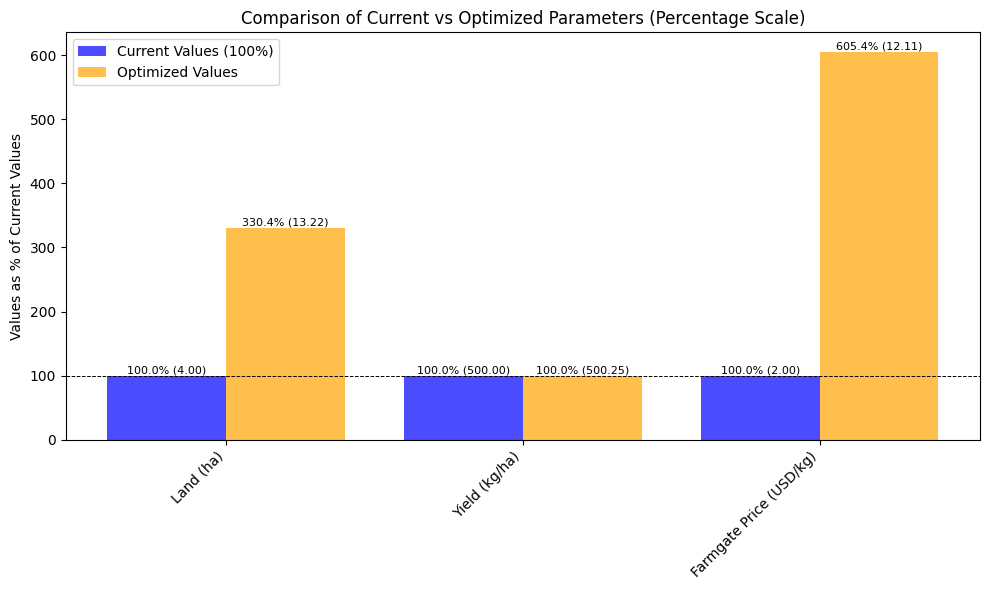

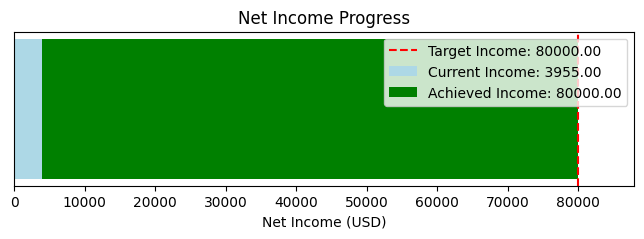

In [37]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define parameter bounds
parameter_bounds = [
    (4,6),          # Land in ha
    (500, 2000),    # Yield in kg/ha
    (0, 200),       # Loss in kg/ha
    (2, 6),         # Farmgate price in USD/kg
    (0, 2),         # Premium price in USD/kg
    (50, 300),      # Labour costs in USD/ha
    (20, 100),      # Seeds costs in USD/ha
    (50, 200),      # Conventional fertilizer in USD/ha
    (30, 150),      # Organic fertilizer in USD/ha
    (20, 100),      # Conventional chemicals in USD/ha
    (10, 50),       # Organic chemicals in USD/ha
    (10, 100),      # Irrigation cost in USD/ha
    (5, 50),        # Energy cost in USD/ha
    (10, 50),       # Other land costs in USD/ha
    (5, 20),        # Storage costs in USD/ha
    (5, 20),        # Marketing costs in USD/ha
    (0, 50),        # Certification costs in USD/ha
    (0, 50),        # Cost of capital in USD/ha
    
    (0.5, 5.0),     # Land size for secondary crop in ha
    (200, 1000),    # Yield for secondary crop in kg/ha
    (0,100),        # Loss for secondary crop
    (1, 5),         # Farmgate price for secondary crop in USD/kg
    (1,1),          # Price premium secondary crop
    (30, 150),      # Labour costs secondary crop in USD/ha
    (20, 50),       # Seeds costs secondary crop in USD/ha
    (50, 100),      # Conventional fertilizer secondary crop in USD/ha
    (30, 80),       # Organic fertilizer secondary crop in USD/ha
    (10, 20),       # Conventional chemicals secondary crop in USD/ha
    (5, 10),        # Organic chemicals secondary crop in USD/ha
    (10, 35),       # Irrigation cost secondary crop in USD/ha
    (5, 15),        # Energy cost secondary crop in USD/ha
    (10, 20),       # Other land costs secondary crop in USD/ha
    (5, 20),        # Storage costs secondary crop in USD/ha
    (5, 20),        # Marketing costs secondary crop in USD/ha
    (0, 50),        # Certification costs secondary crop in USD/ha
    (0, 50),        # Cost of capital secondary crop in USD/ha
    
    (100, 120),     # Livestock income in USD
    (50, 200),      # Off-farm income in USD
    (0, 300),       # Investments and transfers in USD
    (0, 300),       # Other net on-farm income in USD
    (0, 300)]       # Other diversified income in USD
    
# Income calculation function
def calculate_net_income(params):
    
    #Define parameters
    (
    land, yield_primary, loss, farmgate_price, premium_price,
    labour_costs, seeds_costs, conv_fertilizer_cost, org_fertilizer_cost,
    conv_chemicals_cost, org_chemicals_cost, irrigation_cost, energy_cost,
    other_land_costs, storage_costs, marketing_costs, certification_costs,
    cost_of_capital, 

    secondary_crop_land, secondary_crop_yield,secondary_crop_loss, 
    secondary_crop_farmgate_price,secondary_crop_premium_price, secondary_crop_labour_cost, secondary_crop_seeds_costs, 
    secondary_crop_conv_fertilizer_cost, secondary_crop_org_fertilizer_cost,
    secondary_crop_conv_chemicals_cost, secondary_crop_org_chemicals_cost, secondary_crop_irrigation_cost, 
    secondary_crop_energy_cost,secondary_crop_other_land_costs, 
    secondary_crop_storage_costs, secondary_crop_marketing_costs, secondary_crop_certification_costs,
    secondary_crop_cost_of_capital,

    livestock_income, off_farm_income, investments_transfers, net_on_farm_income, diversified_income
    ) = params

    # Revenue components
    primary_crop_revenue = land * (yield_primary - loss) * (farmgate_price + premium_price)
    secondary_crop_revenue = secondary_crop_land * (secondary_crop_yield - secondary_crop_loss) * (secondary_crop_farmgate_price + secondary_crop_premium_price)
    
    
    # Cost components primary crop
    input_costs_primary = labour_costs + seeds_costs + conv_fertilizer_cost + org_fertilizer_cost +conv_chemicals_cost + org_chemicals_cost
    irrigation_energy_costs_primary = irrigation_cost + energy_cost
    land_related_costs_primary = other_land_costs + storage_costs + marketing_costs
    certification_financing_costs_primary = certification_costs + cost_of_capital
    total_costs_primary = input_costs_primary + irrigation_energy_costs_primary + land_related_costs_primary + certification_financing_costs_primary
    
    # Cost components secondary crop
    input_costs_secondary = secondary_crop_labour_cost + secondary_crop_seeds_costs + secondary_crop_conv_fertilizer_cost + secondary_crop_org_fertilizer_cost +secondary_crop_conv_chemicals_cost + secondary_crop_org_chemicals_cost
    irrigation_energy_costs_secondary = secondary_crop_irrigation_cost + secondary_crop_energy_cost
    land_related_costs_secondary = secondary_crop_other_land_costs + secondary_crop_storage_costs + secondary_crop_marketing_costs
    certification_financing_costs_secondary = secondary_crop_certification_costs + secondary_crop_cost_of_capital
    total_costs_secondary = input_costs_secondary + irrigation_energy_costs_secondary + land_related_costs_secondary + certification_financing_costs_secondary
    
    # Net income
    net_income_primary = primary_crop_revenue - total_costs_primary
    net_income_secondary = secondary_crop_revenue - total_costs_secondary
    net_income = net_income_primary + net_income_secondary + livestock_income + off_farm_income + investments_transfers + net_on_farm_income + diversified_income
    
    return net_income

def optimize_income(target_income, parameter_bounds, current_values, editable_indices, penalty_factor=1):
    # Helper function: maximize income to determine the upper bound
    def find_max_income():
        def max_income_objective(params):
            return -calculate_net_income(params)  # Negative for maximization
        
        # Adjust bounds for non-editable indices only
        bounds = [
            (None, None) if i in editable_indices else (current_values[i], current_values[i])
            for i in range(len(current_values))
        ]
        
        # Solve for maximum income
        result = minimize(max_income_objective, np.array(current_values), bounds=bounds)
        return -result.fun, result.x  # Return the maximum income and parameters

    # Objective: Minimize changes to editable parameters
    def deviation_objective(params):
        deviation = sum(
            (params[i] - current_values[i])**2
            for i in editable_indices
        )
        
        # Add penalty for exceeding bounds (relative to the bound values)
        penalty = 0
        for i in editable_indices:
            lower_bound, upper_bound = parameter_bounds[i]
            
            if lower_bound is not None and params[i] < lower_bound:
                # Relative difference from lower_bound
                ratio = (lower_bound - params[i]) / (abs(lower_bound) + 1e-9)
                penalty += penalty_factor * ratio**2
        
            if upper_bound is not None and params[i] > upper_bound:
                # Relative difference from upper_bound
                ratio = (params[i] - upper_bound) / (abs(upper_bound) + 1e-9)
                penalty += penalty_factor * ratio**2
        
        return deviation + penalty


    # Constraint: Ensure net income meets or exceeds the target
    def income_constraint(params):
        return calculate_net_income(params) - target_income

    # Preliminary step: Find maximum achievable income
    max_income, max_params = find_max_income()
    
    if target_income > max_income:
        print(f"Target income {target_income} is not achievable. Switching to maximize income.")
        target_income = max_income  # Adjust the target for feasibility
    
    # Constraints
    constraints = [{'type': 'ineq', 'fun': income_constraint}] if target_income <= max_income else []

    # Adjust bounds for non-editable indices only
    bounds = [
        (None, None) if i in editable_indices else (current_values[i], current_values[i])
        for i in range(len(current_values))
    ]

    # Initial guess (current values)
    x0 = np.array(current_values)

    # Solve optimization
    objective_function = deviation_objective if target_income <= max_income else lambda params: -calculate_net_income(params)
    result = minimize(objective_function, x0, bounds=bounds, constraints=constraints)

    # Check feasibility
    if not result.success:
        print("Warning: Optimization failed to find a solution.")
    
    return result

def create_comparison_bar_chart(current_values, optimized_values, parameter_labels, editable_indices):
    # Select only editable parameters for comparison
    current_values_editable = [current_values[i] for i in editable_indices]
    optimized_values_editable = [optimized_values[i] for i in editable_indices]
    parameter_labels_editable = [parameter_labels[i] for i in editable_indices]
    
    # Normalize both current and optimized values as percentages relative to current values
    current_percentages = [100] * len(current_values_editable)  # Current values normalized to 100%
    optimized_percentages = [
        (optimized / current * 100) if current != 0 else 0
        for current, optimized in zip(current_values_editable, optimized_values_editable)
    ]
    
    n = len(editable_indices)  # Number of editable parameters
    indices = np.arange(n)  # Indices for bar positions
    width = 0.4  # Bar width
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Bar chart for current and optimized percentages
    bars1 = ax.bar(indices - width / 2, current_percentages, width, label='Current Values (100%)', color='blue', alpha=0.7)
    bars2 = ax.bar(indices + width / 2, optimized_percentages, width, label='Optimized Values', color='orange', alpha=0.7)
    
    # Add labels and legend
    ax.set_xticks(indices)
    ax.set_xticklabels(parameter_labels_editable, rotation=45, ha='right')
    ax.set_ylabel("Values as % of Current Values")
    ax.set_title("Comparison of Current vs Optimized Parameters (Percentage Scale)")
    ax.legend()
    
    # Annotate bars with percentage and actual values
    for bars, percentages, values in zip([bars1, bars2], [current_percentages, optimized_percentages], [current_values_editable, optimized_values_editable]):
        for bar, percentage, value in zip(bars, percentages, values):
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{percentage:.1f}% ({value:.2f})",
                ha='center',
                va='bottom' if percentage > 0 else 'top',
                fontsize=8
            )
    
    plt.axhline(100, color='black', linewidth=0.7, linestyle='--', label='Baseline (100%)')  # Add horizontal line at 100%
    plt.tight_layout()
    plt.show()
    

def create_income_progress_bar(target_income, achieved_income, current_income):
    fig, ax = plt.subplots(figsize=(8, 2))
    
    # Set progress bar range
    ax.barh(
        y=[0], width=[current_income], color='lightblue', label=f"Current Income: {current_income:.2f}"
    )
    ax.barh(
        y=[0], width=[achieved_income - current_income], left=[current_income],
        color='green', label=f"Achieved Income: {achieved_income:.2f}"
    )
    ax.axvline(target_income, color='red', linestyle='--', label=f"Target Income: {target_income:.2f}")
    
    # Formatting
    ax.set_xlim(0, max(target_income, achieved_income) * 1.1)
    ax.set_yticks([])
    ax.set_xlabel("Net Income (USD)")
    ax.legend(loc='upper right')
    plt.title("Net Income Progress")
    plt.show()


# Example input
target_income = 80000  # Target net income

current_values = [
    4, 500, 0, 2, 0, 50, 20, 50, 30, 20, 10, 10, 5, 10, 5, 5, 0, 0, 0.5, 200, 0, 1,1, 30, 20,
    50, 30, 10, 5, 10, 5, 10, 5, 5, 0, 0,
    100, 50, 0, 0, 0
]  # Current parameter values

editable_indices = [0, 1, 3]  # Indices of editable parameters

parameter_labels = [
    "Land (ha)","Yield (kg/ha)", "Loss (kg/ha)", "Farmgate Price (USD/kg)", "Premium Price (USD/kg)", "Labour Costs (USD/ha)",
    "Seeds (USD/ha)", "Conv Fertilizer (USD/ha)", "Org Fertilizer (USD/ha)", "Conv Chemicals (USD/ha)",
    "Org Chemicals (USD/ha)", "Irrigation Cost (USD/ha)", "Energy Cost (USD/ha)", "Other Land Costs (USD/ha)",
    "Storage Costs (USD/ha)", "Marketing Costs (USD/ha)", "Certification Costs (USD/ha)", "Cost of Capital (USD/ha)",
    
    "Land for Sec Crop (ha)", "Yield Sec Crop (kg/ha)", "Loss for Sec Crop (kg/ha)", "Farmgate price Sec Crop (USD/kg)", 
    "Premium proce Sec Crop (USD/kg)", "Labour Costs Sec Crop (USD/ha)", "Seeds Sec Crop (USD/ha)", 
    "Conv Fertilizer Sec Crop (USD/ha)", "Org Fertilizer Sec Crop (USD/ha)", "Conv Chemicals Sec Crop(USD/ha)",
    "Org Chemicals Sec Crop(USD/ha)", "Irrigation Cost Sec Crop (USD/ha)", "Energy Cost Sec Crop (USD/ha)", 
    "Other Land Costs Sec Crop(USD/ha)", "Storage Costs Sec Crop (USD/ha)", "Marketing Costs Sec Crop (USD/ha)", 
    "Certification Costs Sec Crop (USD/ha)", "Cost of Capital Sec Crop (USD/ha)",
    
    "Livestock Income (USD)", "Off-Farm Income (USD)", "Investments Transfers (USD)", "Net On-Farm Income (USD)",
    "Diversified Income (USD)"
]
# Calculate current income
current_income = calculate_net_income(current_values)
# Run optimization
result = optimize_income(target_income, parameter_bounds, current_values, editable_indices)

# Display results
optimized_values = result.x
achieved_income = calculate_net_income(optimized_values)

# Display results
print("Current Net Income:", current_income)
print("Optimization Success:", result.success)
print("Optimized Parameters:", optimized_values)
print("Achieved Net Income:", achieved_income)

# Visualize results
create_comparison_bar_chart(current_values, optimized_values, parameter_labels, editable_indices)
create_income_progress_bar(target_income, achieved_income, current_income)